In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import xarray as xr
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from shapely.geometry import Polygon


C:\Users\thivi\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\thivi\anaconda3\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


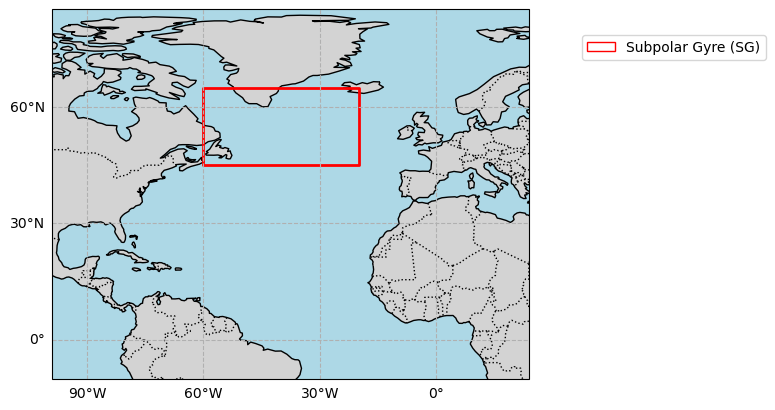

In [3]:
# Define the geographic extent
lon_min = -99
lon_max = 24
lat_min = -5
lat_max = 80



# Create a figure and axis using a specific projection (e.g., PlateCarree)
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

# Set the extent of the map using the specified longitude and latitude boundaries
ax.set_extent([lon_min, lon_max, lat_min, lat_max])

# Add features to the map (e.g., continents)
ax.add_feature(cfeature.COASTLINE, edgecolor='black')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, facecolor='lightgrey')

# Set the color of the ocean to blue
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Custom gridlines for longitude and latitude
lon_values = range(-120, 150, 30)  # Custom longitude values
lat_values = range(-60, 90, 30)   # Custom latitude values

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--')
gl.xlocator = plt.FixedLocator(lon_values)  # Specify custom longitude gridlines
gl.ylocator = plt.FixedLocator(lat_values)  # Specify custom latitude gridlines

# Display labels only on the bottom and left sides
gl.xlabels_top = False
gl.ylabels_right = False

# Define the coordinates for a simplified Arctic Subpolar Gyre
gyre_coordinates = [(x, y) for x, y in zip([-60, -20, -20, -60], [45, 45, 65, 65])]

# Create a Polygon from the coordinates
gyre_polygon = Polygon(gyre_coordinates)

# Plot the gyre on the map
ax.add_geometries([gyre_polygon], crs=ccrs.PlateCarree(), edgecolor='red', facecolor='none', linewidth=2)


# Create a proxy artist with only edgecolor
proxy_artist = mpatches.Patch(facecolor='none', edgecolor='red', label='Subpolar Gyre (SG)')

# Add a legend using the proxy artist
legend = plt.legend(handles=[proxy_artist], loc='upper right', bbox_to_anchor=(1.51, 0.95))


plt.show()
